# Data Wrangling

Data Wrangling is the process of taking data and prepping it for further analysis.

For this example, we will 'wrangle' the data from our automobile prices dataset.

#### Import required packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

## Import the data

Use the Pandas method ```read_csv()``` to load the data.

In [2]:
df_loan = pd.read_csv('C:/Users/Owner/ISDS7070/bank-additional-full.csv', sep=';')

View the first few rows of the dataframe

In [7]:
df_loan.tail(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41168,38,entrepreneur,married,university.degree,no,no,no,cellular,nov,wed,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41169,62,services,married,high.school,no,yes,no,cellular,nov,wed,...,5,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41170,40,management,divorced,university.degree,no,yes,no,cellular,nov,wed,...,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41171,33,student,married,professional.course,no,yes,no,telephone,nov,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41172,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no
41176,38,housemaid,divorced,high.school,no,yes,yes,cellular,nov,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,no
41177,57,retired,married,professional.course,no,yes,no,cellular,nov,thu,...,6,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,no


In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df_loan.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Do you see any missing or concerning values?

## Identify and handle missing values


#### Convert "?" to NaN

In our automobile dataset, missing data comes with the question mark "?".

Replace "?" with the numpy NaN.  Why NaN?  It is the Pandas default for missing data. 

In [5]:
df_auto.replace("?", np.nan, inplace = True)
df_auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Pandas comes with a built-in method for identifying missing values. **isnull()**
    
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [6]:
has_null = df_auto.isnull()
has_null.tail(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
191,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
192,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
193,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
194,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" stands for missing value, while "False" stands for not missing value.

####  Explore missing values

Use the ```info()``` method to view which columns are missing data.


In [7]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

### Deal with missing data

delete it:
- drop the whole row
- drop the whole column
    
replace it:
- replace it by average (mean)
- replace it by frequency (mode)
- other creative solution
   

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

**Replace by mean:**
- normalized-losses: 41 missing data points
- stroke: 4 missing data points
- bore: 4 missing data points
- horsepower: 2 missing data points
- peak-rpm: 2 missing data points


**Replace by frequency:**
- num-of-doors: 2 missing data, replace them with "four". Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur
        

**Drop the whole row:**
- price: 4 missing data, simply delete the whole row. Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful.

#### Calculate the mean of the 'normalized-losses' column

In [8]:
avg_norm_loss = df_auto["normalized-losses"].astype("float").mean()
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


#### Replace "NaN" by mean value in "normalized-losses" column

In [9]:
df_auto["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#### Calculate the mean value for 'bore' column

In [10]:
avg_bore = df_auto['bore'].astype('float').mean()
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


#### Replace NaN by mean value

In [11]:
df_auto["bore"].replace(np.nan, avg_bore, inplace=True)

#### Calculate the mean value for 'stroke' column

In [12]:
avg_stroke = df_auto["stroke"].astype("float").mean()
print("Average of stroke:", avg_stroke)

Average of stroke: 3.255422885572139


#### Replace NaN by mean value in 'stroke' column

In [13]:
df_auto["stroke"].replace(np.nan, avg_stroke, inplace = True)

<h4>Calculate the mean value for the  'horsepower' column:</h4>

In [14]:
avg_horsepower = df_auto['horsepower'].astype('float').mean()
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


<h4>Replace "NaN" by mean value:</h4>

In [15]:
df_auto['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

<h4>Calculate the mean value for 'peak-rpm' column:</h4>

In [16]:
avg_peakrpm = df_auto['peak-rpm'].astype('float').mean()
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


<h4>Replace NaN by mean value:</h4>

In [17]:
df_auto['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

To see which values are present in a particular column, we can use the ".value_counts()" method:

In [18]:
df_auto['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

In [19]:
df_auto['num-of-doors'].value_counts().idxmax()

'four'

The replacement procedure is very similar to what we have seen previously

In [20]:
#replace the missing 'num-of-doors' values by the most frequent 
df_auto["num-of-doors"].replace(np.nan, "four", inplace=True)

Finally, let's drop all rows that do not have price data:

In [21]:
# simply drop whole row with NaN in "price" column
df_auto.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df_auto.reset_index(drop=True, inplace=True)

In [22]:
df_auto.head(30)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


***Excellent!*** Our dataset now has no missing values.

### Correct data format

The next step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In Pandas, we use 
***.dtype()*** to check the data type 
***.astype()*** to change the data type

#### Lets list the data types for each column

In [23]:
df_auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

So, some of the datatypes are not correct. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'

#### Update data types to proper format

In [24]:
df_auto[["bore", "stroke"]] = df_auto[["bore", "stroke"]].astype("float")
df_auto[["normalized-losses"]] = df_auto[["normalized-losses"]].astype("int")
df_auto[["price"]] = df_auto[["price"]].astype("float")
df_auto[["peak-rpm"]] = df_auto[["peak-rpm"]].astype("float")

<h4>Let us list the columns after the conversion</h4>

In [25]:
df_auto.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

***Spectacular!***

No missing data and the columns are in the correct format.

## Data Standardization

In our field, we standardize data to make the meaningful comparison.

*** Transform mpg to L/100km: ***
In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard
We will need to apply ***data transformation*** to transform mpg into L/100km.

The formula for unit conversion is

L/100km = 235 / mpg

https://en.wikipedia.org/wiki/Fuel_economy_in_automobiles

In [26]:
# Convert city-mpg to L/100km by mathematical operation (235 divided by mpg)
df_auto['city-L/100km'] = 235/df_auto["city-mpg"]


In [27]:
df_auto["highway-L/100km"] = 235/df_auto["highway-mpg"]

In [28]:
# check your transformed data 
df_auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


## Data Normalization

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [29]:
# replace (original value) by (original value)/(maximum value)
df_auto['length'] = df_auto['length']/df_auto['length'].max()
df_auto['width'] = df_auto['width']/df_auto['width'].max()
df_auto['height'] = df_auto['height']/df_auto['height'].max() 

In [30]:
df_auto[["length","width","height"]].head(50)

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
5,0.851994,0.920833,0.887960
6,0.925997,0.991667,0.931438
7,0.925997,0.991667,0.931438
8,0.925997,0.991667,0.934783
9,0.849592,0.900000,0.908027


Here we can see, we've normalized "length", "width" and "height" in the range of [0,1].

## Binning

Binning is a way to group a number of more or less continuous values into a smaller number of "bins". For example, if you have data about a group of people, you might want to arrange their ages into a smaller number of age intervals.

In the auto dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? 

We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins 


 Convert data to correct format 

In [31]:
df_auto["horsepower"] = df_auto["horsepower"].astype(int)

Lets plot the histogram of horspower, to see what the distribution of horsepower looks like.

Text(0.5,1,'horsepower bins')

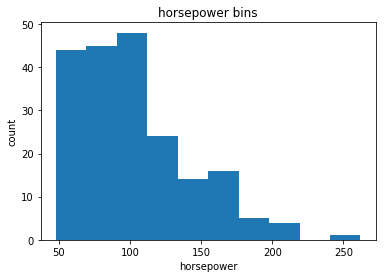

In [32]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df_auto["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

We would like 3 bins of equal size bandwidth so we use numpy's ```linspace(start_value, end_value, numbers_generated``` function.

Since we want to include the minimum value of horsepower we want to set start_value=min(df_auto["horsepower"]).

Since we want to include the maximum value of horsepower we want to set end_value=max(df_auto["horsepower"]).

Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.

We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.

In [33]:
bins = np.linspace(min(df_auto["horsepower"]), max(df_auto["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

 We set group  names:

In [34]:
group_names = ['Low', 'Medium', 'High']

 We apply the function "cut" the determine what each value of "df['horsepower']" belongs to. 

In [35]:
df_auto['horsepower-binned'] = pd.cut(df_auto['horsepower'], bins, labels=group_names, include_lowest=True )
df_auto[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Lets see the number of vehicles in each bin.

In [36]:
df_auto["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Lets plot the distribution of each bin.

Text(0.5,1,'horsepower bins')

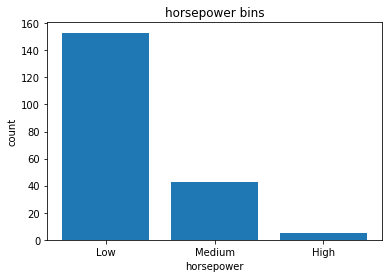

In [37]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df_auto["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>
    Check the dataframe above carefully, you will find the last column provides the bins for "horsepower" with 3 categories ("Low","Medium" and "High"). 
</p>
<p>
    We successfully narrow the intervals from 57 to 3!
</p>

The plot above shows the binning result for attribute "horsepower". 

## Dummy variable 

A dummy variable (or indicator variable) is a numeric variable that represents categorical data, such as gender, race, political affiliation, etc.

The column "fuel-type" has two unique values, "gas" or "diesel". Statistical models don't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.

We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 

In [38]:
df_auto.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

get indicator variables and assign it to data frame "dummy_variable_1" 

In [39]:
df_auto = pd.get_dummies(df_auto, columns=['fuel-type'])

In [40]:
df_auto.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type_diesel,fuel-type_gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1


change column names for clarity 

In [41]:
df_auto.rename(columns={'fuel-type_gas':'gas', 'fuel-type_diesel':'diesel'}, inplace=True)
df_auto.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1


The last two columns are now the indicator variable representation of the fuel-type variable. It's all 0s and 1s now.

Add dummy variable for 'aspriation'.

In [42]:
df_auto = pd.get_dummies(df_auto, columns=['aspiration'])
df_auto.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,aspiration_std,aspiration_turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


In [43]:
df_auto.rename(columns={'aspiration_std':'std', 'aspiration_turbo': 'turbo'}, inplace=True)
df_auto.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


Drop ununsed columns.

save the new csv 

In [44]:
df_auto.to_csv('auto_wrangled.csv')

In [45]:
df_auto_quiz = pd.read_csv('auto_wrangled.csv')

In [46]:
df_auto_quiz.describe()


,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000
